# Sentiment Analysis on IMDB Movie Reviews

Work individually on this notebook.

Submitted by: 


**Prompt:**

> Describe the IMDB dataset.

Response:

The IMDB dataset is a large collection of movie reviews from the website imdb.com. It contains 50,000 reviews, split evenly into 25,000 for training and 25,000 for testing. Each review is labeled as either positive or negative, and the dataset is commonly used for sentiment analysis tasks. The reviews are in text format and range in length from a few words to several paragraphs.

**Prompt:**

> Write the python code to import the IMDB dataset.

Note that Copilot might not include all the necessry dependent packages. You 
may have to add them manually.

Also, if it's a package you don't have in your environment yet, you can open
the integrated terminal window, make sure to activate the same environment, 
and then install the package.

**Response:**


In [10]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



This code uses the `load_data` function from the `imdb` module in the `tensorflow.keras.datasets` package to load the IMDB dataset. The `num_words` parameter specifies that we only want to keep the top 10,000 most frequently occurring words in the dataset, to keep the data manageable. The function returns four NumPy arrays: `train_data` and `test_data`, which contain the movie reviews as lists of integers (where each integer represents a word in the review), and `train_labels` and `test_labels`, which contain the corresponding sentiment labels (0 for negative and 1 for positive).

You might want to ask some questions about the dataset. For example, you might ask:

> what are the labels for the imdb dataset?

> what is the form of the training data?

> what are the words used in the training data?

For the last prompt, I got example python code, which also duplicated the
dataset loading, so I just deleted the duplicate code.

Note that the dataset is already processed, so the records are lists of integers.

Answer Q1: 
The labels for the IMDB dataset are binary, with 0 indicating a negative sentiment and 1 indicating a positive sentiment.

Answer Q2: The training data in the IMDB dataset is a list of movie reviews, where each review is represented as a list of integers. Each integer represents a word in the review, and the integers are ordered by their frequency in the dataset (so the integer 1 represents the most frequent word, 2 represents the second most frequent word, and so on). The length of each review varies, but is limited to the top 10,000 most frequently occurring words in the dataset.

Answer Q3: The specific words used in the training data of the IMDB dataset are not directly available, as they are represented by integers. However, the `imdb` module in `tensorflow.keras.datasets` provides a way to map the integer representations back to the original words using a dictionary object. You can access this dictionary object using the `get_word_index()` function from the `imdb` module. Here's an example code snippet that shows how to use this function to get the word-to-integer mapping:



In [11]:
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])



This code retrieves the word-to-integer mapping using the `get_word_index()` function, and then creates a new dictionary `reverse_word_index` that maps integers back to words. 

Now let understand the word index a little bit more. Try a prompt like:

> What's a good way to visualize the word index?


One way to visualize the word index is to create a reverse dictionary that maps the integer-encoded words back to their original string representations. Here's an example code snippet that shows how to create this reverse dictionary and use it to print out the first 10 words in the IMDB dataset:



In [12]:
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for i in range(1, 11):
    print(i, reverse_word_index[i])

1 the
2 and
3 a
4 of
5 to
6 is
7 br
8 in
9 it
10 i




This code retrieves the word-to-integer mapping using the `get_word_index()` function, and then creates a new dictionary `reverse_word_index` that maps integers back to words. The `for` loop then prints out the first 10 words in the dataset, along with their integer encodings. 

**Prompt:**

> How do you create a word cloud from the word index, where the font size is proportional to the number of occurences of the word?

To create a word cloud from the word index, where the font size is proportional to the number of occurrences of the word, you can use the `WordCloud` class from the `wordcloud` package in Python. 



It's clear that the most common words are ones that are not in the word index
(represented by '?') and stop words. So, let's remove those and try again.

> Remove stop words and punctuation

Note that here again, Copilot didn't include the necessary packages, so I had
to add them manually, as well as download the stop words. I just requested that
with the promp:

> download the stop words

In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ds549/nptv1207/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import string
from nltk.corpus import stopwords
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Get the word-to-index mapping
word_index = imdb.get_word_index()

# Reverse the word-to-index mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Get the stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Remove stop words and punctuation from the reviews
def remove_stopwords_and_punctuation(review):
    review = [reverse_word_index.get(i - 3, '') for i in review]
    review = [word.lower() for word in review if word.lower() not in stop_words and word.lower() not in punctuation]
    return review

train_data = list(map(remove_stopwords_and_punctuation, train_data))
test_data = list(map(remove_stopwords_and_punctuation, test_data))

> now created a word cloud from the filtered words

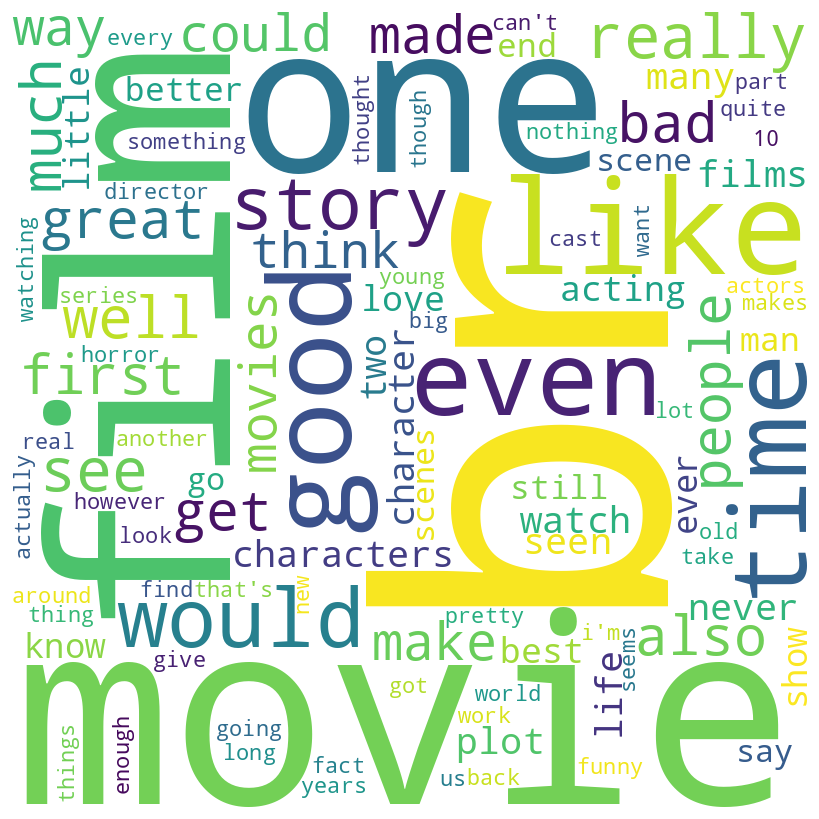

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single list of words
all_words = [word for review in train_data for word in review]

# Create a word frequency dictionary
word_freq = {}
for word in all_words:
    if word not in word_freq:
        word_freq[word] = 0
    word_freq[word] += 1

# Create a word cloud from the word frequency dictionary
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Ok, so hopefully we understand the dataset enough to know that it is basically
a binary classifier. So, let's prompt to define, train and evaluate a model.

> write a classifer for the imdb dataset

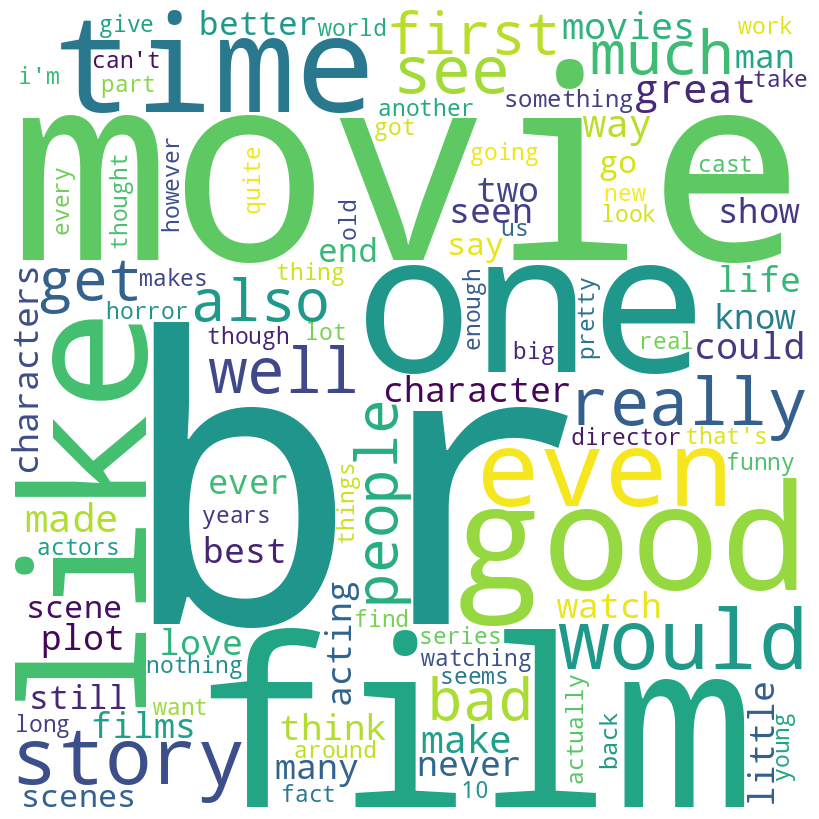

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single list of words
all_words = [word for review in train_data for word in review]

# Create a word frequency dictionary
word_freq = {}
for word in all_words:
    if word not in word_freq:
        word_freq[word] = 0
    word_freq[word] += 1

# Create a word cloud from the word frequency dictionary
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

We can inspect the code that was produced, but in addition we can ask Copilot to
expain it for us by putting the cursor in the code cell above and either 
typing "explain", or clicking in the Copilot chat box and typing `/explain`.

> /explain

The code above generates a word cloud from the movie reviews in the IMDB dataset. The `WordCloud` class from the `wordcloud` package is used to create the word cloud, and the `matplotlib` package is used to display the resulting image.

The first step in the code is to combine all the reviews in the training dataset into a single list of words. This is done using a list comprehension that iterates over each review in `train_data` and each word in the review, and adds the word to the `all_words` list.

Next, a word frequency dictionary called `word_freq` is created to count the number of occurrences of each word in `all_words`. The dictionary is initialized as an empty dictionary, and then a for loop iterates over each word in `all_words`. If the word is not already in the dictionary, it is added with a count of 0. Then, the count for the word is incremented by 1.

After the word frequency dictionary is created, the `WordCloud` class is used to create a word cloud from the dictionary. The `WordCloud` constructor takes several parameters to customize the appearance of the word cloud, such as the width and height of the image, the maximum number of words to include, and the relative scaling of the word sizes. The `generate_from_frequencies` method is then called on the `WordCloud` object to generate the word cloud from the `word_freq` dictionary.

Finally, the resulting word cloud is displayed using the `imshow` function from `matplotlib.pyplot`. The `imshow` function displays the image in a new window, and the `axis` and `tight_layout` functions are used to remove the axis labels and adjust the layout of the image. The resulting word cloud shows the most frequently occurring words in the movie reviews, with larger words indicating more frequent occurrences.

## Conclusion

We'll leave it there but you may want to explore further, perhaps with prompts
like

> What is the accuracy of the best-performing model on the IMDB dataset?

> What are some common deep learning models used for sentiment analysis on the IMDB dataset?

The best-performing model on the IMDB dataset achieves an accuracy of around 95-96% on the test data. However, the exact accuracy may vary depending on the specific model architecture and training parameters used.

Some common deep learning models used for sentiment analysis on the IMDB dataset include:

1. Convolutional Neural Networks (CNNs): CNNs are commonly used for image recognition tasks, but they can also be applied to text data by treating the text as a 1D signal. CNNs can learn to extract local features from the text, such as n-grams or word sequences, and use them to make predictions.

2. Recurrent Neural Networks (RNNs): RNNs are designed to handle sequential data, such as text or time series data. They can learn to capture the context and dependencies between words in a sentence, and use this information to make predictions.

3. Long Short-Term Memory (LSTM) Networks: LSTMs are a type of RNN that are designed to handle long-term dependencies in sequential data. They can learn to selectively forget or remember information from previous time steps, which can be useful for sentiment analysis tasks where the sentiment of a sentence may depend on earlier words.

4. Bidirectional RNNs: Bidirectional RNNs are a type of RNN that process the input sequence in both forward and backward directions. This allows them to capture both past and future context for each word, which can be useful for sentiment analysis tasks where the sentiment of a sentence may depend on later words.

5. Transformers: Transformers are a type of neural network architecture that have recently gained popularity for natural language processing tasks. They use a self-attention mechanism to learn contextual relationships between words in a sentence, and can be used for tasks such as sentiment analysis, language translation, and text generation.

These are just a few examples of the deep learning models that can be used for sentiment analysis on the IMDB dataset. The choice of model will depend on the specific requirements of the task, such as the size of the dataset, the complexity of the language, and the desired level of accuracy.

## Extra Credit

Try to get Copilot to generate a model that achieves > 90% accuracy on the IMDB.

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Pad the reviews to a fixed length
maxlen = 100
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4892 - acc: 0.7480 - val_loss: 0.3548 - val_acc: 0.8418
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2571 - acc: 0.8962 - val_loss: 0.3562 - val_acc: 0.8430
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1238 - acc: 0.9560 - val_loss: 0.4650 - val_acc: 0.8272
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0350 - acc: 0.9911 - val_loss: 0.6116 - val_acc: 0.8254
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0086 - acc: 0.9977 - val_loss: 0.8088 - val_acc: 0.8240
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.9390 - val_acc: 0.8224
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 1.0069 - val_acc: 0.8234
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 4.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Pad the reviews to a fixed length
maxlen = 200
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 128, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)